# 2 - 15 vs 50 Year Module

Comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability.





![Folder 15 vs 50 year Module](../images_wiki/2_15vs50Overview.PNG)

This scenario is a though experiment comparing a 15-year 95% recyclable module versus a 50-year module 30% recyclable module.
This is done to understand potential tradeoffs in PV technology evolution - is it better to create
a completely recyclable PV panel, or to extend the module lifetime.
This scenario assumes that the 15-year module is 95% recyclable into high quality material, i.e. it will be used to create new modules.

95% recyclability is represented by a 100% collection rate and a 95% efficient recycling process.

The 50-year module uses the previous settings.

Plot the annual waste glass sent to the landfill for this scenario. 
Here, because the 15-module is 100% collected and only 5% is landfilled during the recycling process
the landfilled glass is very low regardless of capacity assumptions.
Thus, if the intent is to avoid landfilled material, a 95% recyclable module is the best technology evolution.


In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
moduleFile = r'..\baselines\baseline_modules_US_100RE2050.csv'


In [5]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='50_Year_Module', file=moduleFile)
r1.scenario['50_Year_Module'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['50_Year_Module'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

r1.createScenario(name='15_Year_Module', file=moduleFile)
r1.scenario['15_Year_Module'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['15_Year_Module'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

r1.createScenario(name='base', file=moduleFile)
r1.scenario['base'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['base'].addMaterial('silicon', file=r'..\baselines\baseline_material_silicon.csv')

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP


In [6]:
r1.scenario['50_Year_Module'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled', 'mod_Repair',
       'mod_MerchantTail', 'mod_Reuse'],
      dtype='object')

## Change Reliability Values

In [7]:

r1.scenario['50_Year_Module'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module'].data['mod_lifetime'] = 50
r1.scenario['15_Year_Module'].data['mod_degradation'] = 0.4

r1.scenario['15_Year_Module'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module'].data['mod_degradation'] = 1.4



## Change Recyclability Values

In [8]:
r1.scenario['15_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['15_Year_Module'].data['mod_EOL_collection_eff'] = 100.0
#r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 90.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 90.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100.0
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100.0 #95% of the above 2 gets turned into new panels

r1.scenario['50_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['50_Year_Module'].data['mod_EOL_collection_eff'] = 100.0
#r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 30.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 30.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100.0
r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100.0 #95% of the above 2 gets turned into new panels


In [9]:
IRENA= False
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta': 30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta': 30}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


In [10]:
r1.scenario['base'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_Collected', 'mat_modules_NotCollected',
       'mat_modules_Recycled', 'mat_modules_NotRecycled',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedSuccessfullyinModuleManufacturing',
       'mat_EnteringModuleManufacturing', 'mat_LostinModuleManufacturing',
       'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_R

Modules installed between 2010 and 2020 become decommissioned on ~2035-2045, that is why the baseline has 'jaggedy' lines that follow the installs on those years.
This jaggedy lines are not seen in the 15_Year_Module example, because 90% of it is going into recycling. You can still see a bit of effect on 2025-2035.
For base, after 2045, and for 15_years, after 2035 become nice curves because the installs follow a CAGR projection.
IF more years where plotted for the 50_year_module, we would see the same jaggediness around 2065-2075


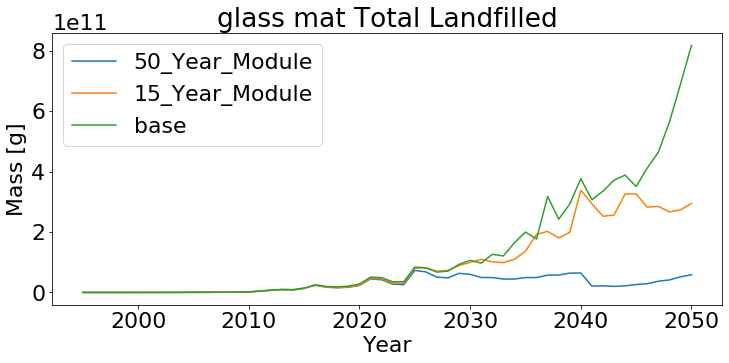

In [11]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
print("Modules installed between 2010 and 2020 become decommissioned on ~2035-2045, that is why the baseline has 'jaggedy' lines that follow the installs on those years.")
print("This jaggedy lines are not seen in the 15_Year_Module example, because 90% of it is going into recycling. You can still see a bit of effect on 2025-2035.")
print("For base, after 2045, and for 15_years, after 2035 become nice curves because the installs follow a CAGR projection.")
print("IF more years where plotted for the 50_year_module, we would see the same jaggediness around 2065-2075")


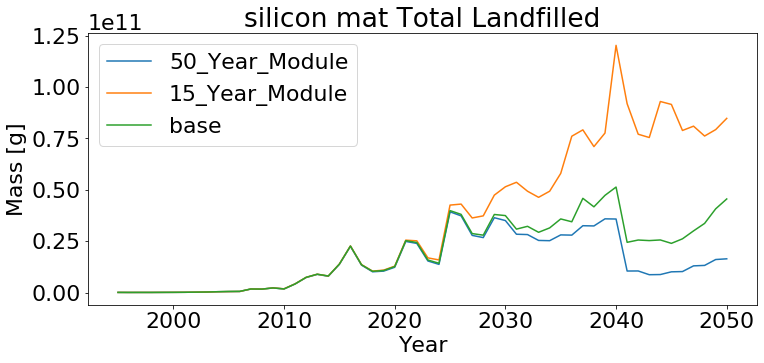

In [12]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

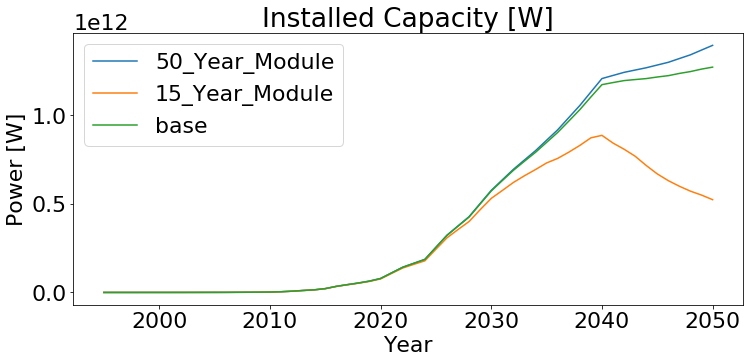

In [13]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

### Modifying Installed Capacity requirements to match 50 Year Module

In [14]:
r1.createScenario(name='15_Year_Module_IncreasedInstalls', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['15_Year_Module_IncreasedInstalls'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_degradation'] = 1.4

r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 90
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 90 
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100 #95% of the above 2 gets turned into new panels

r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


### Modifing the installed capacity requiremetns according to t50. 

Needs to run each year becuase it needs to calculate the acumulated installs and deads.


In [15]:
Under_Installment = []
for i in range (0, len(r1.scenario['base'].data)):
    Under_Installment = ( (r1.scenario['base'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
    r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************


C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Pow

Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Pow

Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15

In [16]:
r1.createScenario(name='50_Year_Module_DecreasedInstalls', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['50_Year_Module_DecreasedInstalls'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_lifetime'] = 50
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_degradation'] = 0.4

r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 30
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_collected_Recycled'] = 100
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycling_eff'] = 30 
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100 #95% of the above 2 gets turned into new panels  
    
r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [17]:
Over_Installment = []
for i in range (0, len(r1.scenario['base'].data)):
    Over_Installment = ( (r1.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['base'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] -= Over_Installment
    r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************


C:\Users\hmirletz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Gene

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Cal

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finish

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculatio

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on 

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  base
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module_DecreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Gene

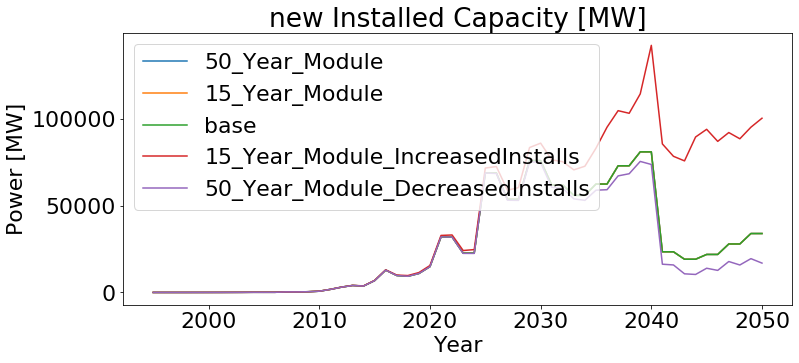

In [18]:
r1.plotScenariosComparison(keyword='new_Installed_Capacity_[MW]')


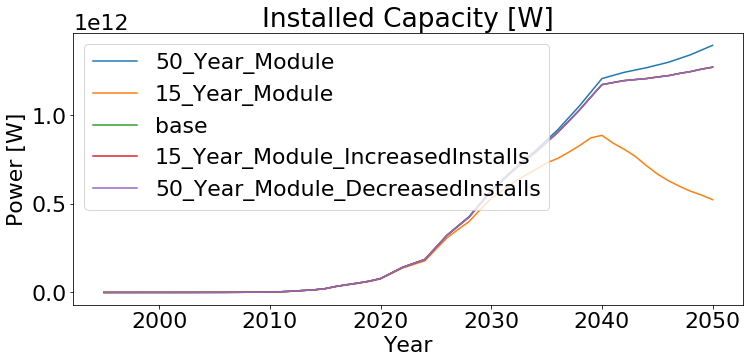

In [19]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

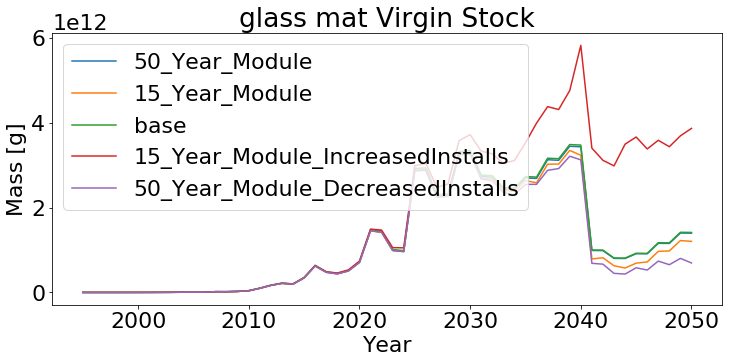

In [20]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Virgin_Stock')


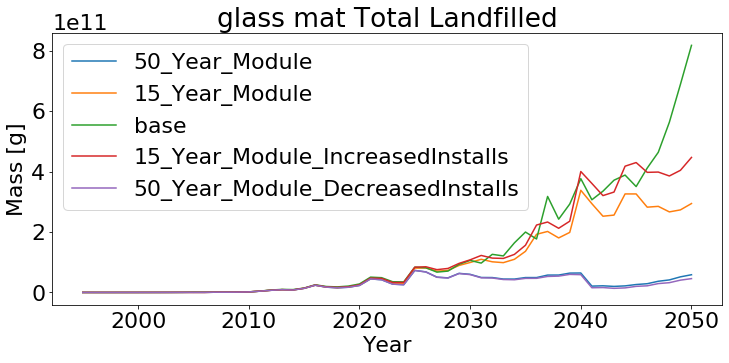

In [21]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')


## Same plots but not automatic from the software to control more the parameters

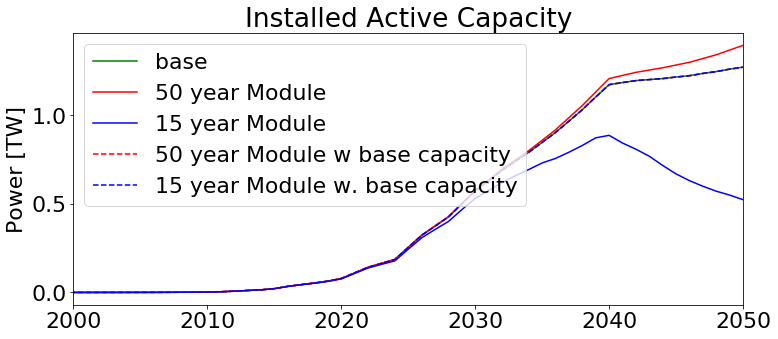

In [22]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].data['Installed_Capacity_[W]']/1e12, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'r', label='50 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'b', label='15 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'r--', label='50 year Module w base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [TW]')

plt.title('Installed Active Capacity')
plt.xlim([2000, 2050])
plt.legend()

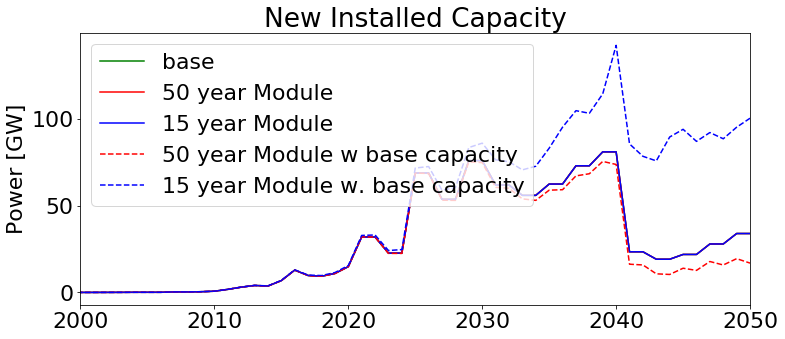

In [23]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].data['new_Installed_Capacity_[MW]']/1e3, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'r', label='50 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'b', label='15 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'r--', label='50 year Module w base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [GW]')

plt.title('New Installed Capacity')
plt.xlim([2000, 2050])
plt.legend()

(2000, 2050)

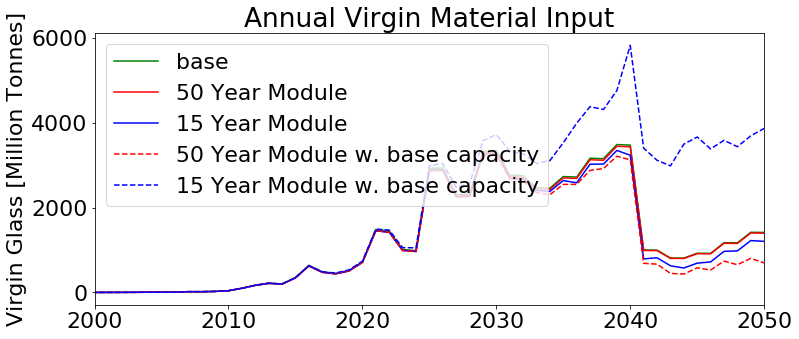

In [24]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r', label='50 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b', label='15 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Virgin Glass [Million Tonnes]')
plt.legend()
plt.title('Annual Virgin Material Input')
plt.xlim([2000, 2050])



(2000, 2050)

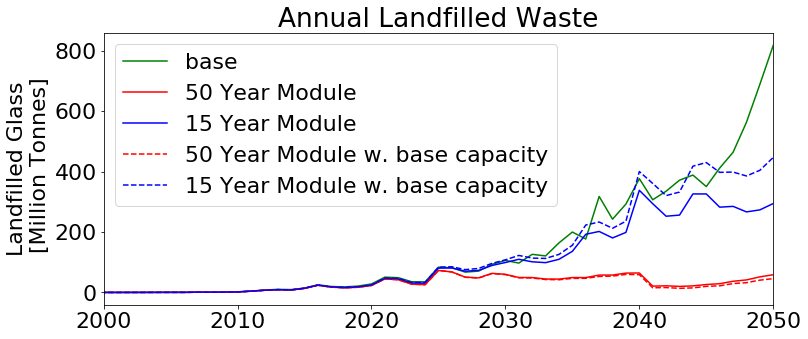

In [25]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r', label='50 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b', label='15 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Landfilled Glass\n [Million Tonnes]')
plt.legend()
plt.title('Annual Landfilled Waste')
plt.xlim([2000, 2050])


# Calculating Overall changes between the Scenarios

In [26]:
cum_Waste = []
cum_VirginNeeds = []
cum_InstalledCapacity = []
cum_NewInstalls = []

for ii in range (0, len(r1.scenario.keys())):
    # Cumulative
    scen = list(r1.scenario.keys())[ii]
    cum_Waste.append(r1.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())
    cum_VirginNeeds.append(r1.scenario[scen].material['glass'].materialdata['mat_Virgin_Stock'].sum())
    cum_NewInstalls.append(r1.scenario[scen].data['new_Installed_Capacity_[MW]'].sum())
    cum_InstalledCapacity.append(r1.scenario[scen].data['Installed_Capacity_[W]'].iloc[-1])

df = pd.DataFrame(list(zip(list(r1.scenario.keys()), cum_Waste, cum_VirginNeeds, cum_NewInstalls, cum_InstalledCapacity)),
               columns =['scenarios','cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity'])

##  Normalize by Base Scenario (row 2)

In [27]:
df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[2] -100

In [28]:
df.round(2)

,scenarios,cum_Waste,cum_VirginNeeds,cum_NewInstalls,cum_InstalledCapacity
0,50_Year_Module,-80.30,-1.35,0.00,9.67
1,15_Year_Module,-30.49,-5.67,0.00,-58.83
2,base,0.00,0.00,0.00,0.00
3,15_Year_Module_IncreasedInstalls,-12.82,54.18,62.87,-0.02
4,50_Year_Module_DecreasedInstalls,-81.76,-10.58,-9.61,-0.04


## LCA Analysis of 15 vs 50 Year Module

We have previously obtained results for ladnfilled waste for 50 year module, 15 year module, and 15 year module with increased installations to reach to 50 year module installed capacity. This is applies the LCA methodology to evaluate environmetnal impacts based on landfilled area.

In [29]:
Area_50years = r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled'].sum()
Area_15years = r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled'].sum()
Area_15years_Increased_Installs = r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled'].sum()

#### First we calculate the Area, based on the glass thickness and glass density and the Total Landfilled Waste [kg]. The PV panel area will be equal to the Glass Area for our modeled scenarios so far.

In [30]:
[acidification, carcinogenics, ecotoxicity, eutrophication, 
fossil_fuel_depletion, global_warming,
non_carcinogenics, ozone_depletion, respiratory_effects, smog] = PV_ICE.calculateLCA(Area_50years)

In [31]:
[acidification2, carcinogenics2, ecotoxicity2, eutrophication2, 
fossil_fuel_depletion2, global_warming2,
non_carcinogenics2, ozone_depletion2, respiratory_effects2, smog2] = PV_ICE.calculateLCA(Area_15years)

In [32]:
[acidification3, carcinogenics3, ecotoxicity3, eutrophication3, 
fossil_fuel_depletion3, global_warming3,
non_carcinogenics3, ozone_depletion3, respiratory_effects3, smog3] = PV_ICE.calculateLCA(Area_15years_Increased_Installs)

In [33]:
global_warming = pd.DataFrame({'Global warming':['50 year', '15 year', '15 year Increased Installs'], 
                               'val':[global_warming, global_warming2, global_warming3]})

Text(0.5, 1.0, 'Global Warming Effect, in kg CO2 eq')

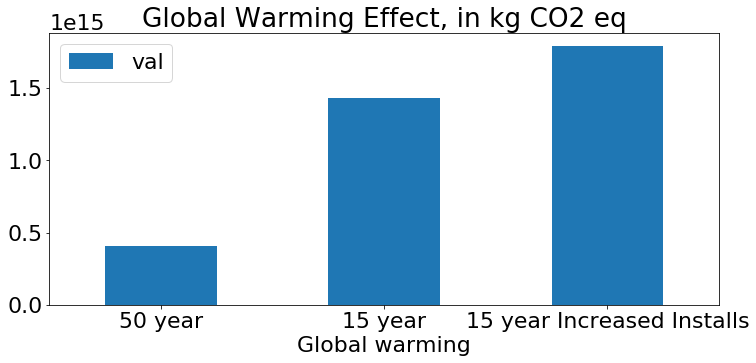

In [34]:
ax = global_warming.plot.bar(x='Global warming', y='val', rot=0)
plt.title('Global Warming Effect, in kg CO2 eq')